<a href="https://colab.research.google.com/github/abhijitguinkatwa/machine-learning-project/blob/main/kyphosis_diseases_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Kyphosis is an abnormally excessive convex curvature of the spine. The kyphosis data frame has 81 rows and 4 columns. representing data on children who have had corrective spinal surgery. Dataset contains 3 inputs and 1 output

INPUTS: 
- Age: in months
- Number: the number of vertebrae involved
- Start: the number of the first (topmost) vertebra operated on.

OUTPUTS:
- Kyphosis: a factor with levels absent present indicating if a kyphosis (a type of deformation) was present after the operation.

In [1]:
#importing libraries
import pandas as pd                # Data Manipulation and exploring
import numpy as np                 # Data Statistical Analysis 
import matplotlib.pyplot as plt    # Data Visualization 
import seaborn as sns   

In [2]:
kyphosis_df = pd.read_csv('/content/kyphosis.csv')
kyphosis_df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [3]:
# View statistical details
kyphosis_df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [4]:
# Print summary of the dataframe. No empty data
kyphosis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


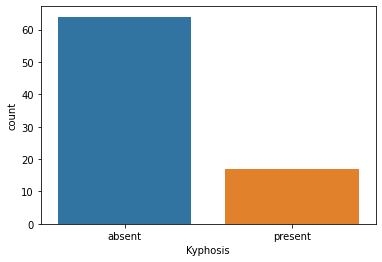

In [5]:
# Count Patients - 64 absent with no kyphosis after operation and 18 preset with the disease after surgery 
sns.countplot(kyphosis_df['Kyphosis'], label = 'Count')

In [6]:
# Perform data preprocessing. Import class
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Instantiate an object out of our class 
LabelEncoder_y = LabelEncoder()

# Replace Kyphosis column ("absent and present") into 0 and 1. Take the object and apply fit transform method to our column
kyphosis_df['Kyphosis'] = LabelEncoder_y.fit_transform(kyphosis_df['Kyphosis'])

In [7]:
kyphosis_df.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15


In [8]:
# Absent - no kyphosis after operation
kyphosis_False = kyphosis_df[kyphosis_df['Kyphosis']== 0]

In [9]:
kyphosis_False.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
3,0,2,5,1
4,0,1,4,15
5,0,1,2,16


In [10]:
print ('Disease absent after operation percentage = ', (len(kyphosis_False)/len(kyphosis_df)) * 100, '%') 

Disease absent after operation percentage =  79.01234567901234 %


In [11]:
# Disease kyphosis Present after the operation
kyphosis_True = kyphosis_df[kyphosis_df['Kyphosis']== 1]

In [12]:
kyphosis_True.head()

,Kyphosis,Age,Number,Start
2,1,128,4,5
9,1,59,6,12
10,1,82,5,14
21,1,105,6,5
22,1,96,3,12


In [13]:
print ('Disease present after operation percentage = ', (len(kyphosis_True)/len(kyphosis_df)) * 100, '%') 

Disease present after operation percentage =  20.98765432098765 %


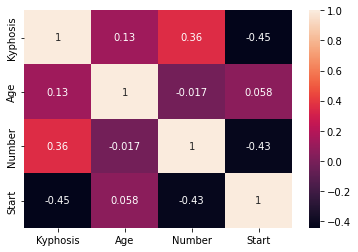

In [14]:
# Correlation 
sns.heatmap(kyphosis_df.corr(), annot = True)

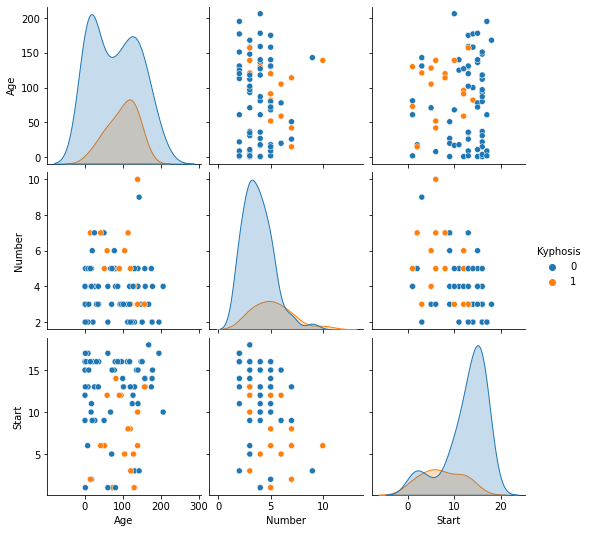

In [15]:
# Visualize 
sns.pairplot(kyphosis_df, hue = 'Kyphosis', vars = ['Age', 'Number', 'Start'])

In [16]:
# (Kyphosis) target class/output and 3 inputs (Age Number and Start)
kyphosis_df

# Drop the target label (Kyphosis column)
X = kyphosis_df.drop(['Kyphosis'], axis = 1)

# Inputs to the Machine learning algorithm
X

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [17]:
# Output target class
y = kyphosis_df['Kyphosis']

y

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int64

In [18]:
# Divide data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)



In [19]:
## Training Model

X_train.shape

y_train.shape

X_test.shape

y_test.shape

(25,)

In [20]:
# Train a decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()    # Instantiate an object out of our class
decision_tree.fit(X_train, y_train)



DecisionTreeClassifier()

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

# Plot the Confusion Matrix for the testing dataset  
y_predict_test = decision_tree.predict(X_test)

In [22]:
y_predict_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0])

In [23]:
y_test

2     1
32    0
54    0
44    0
56    0
41    0
9     1
71    0
35    0
59    0
61    1
49    0
68    0
26    0
20    0
17    0
3     0
63    0
4     0
79    1
21    1
67    0
74    0
40    1
19    0
Name: Kyphosis, dtype: int64

In [25]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.67      0.67      0.67         6

    accuracy                           0.84        25
   macro avg       0.78      0.78      0.78        25
weighted avg       0.84      0.84      0.84        25



In [26]:
# Random Forest classifier to improve the model
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators=150)
RandomForest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [27]:
#predicting on test data
y_predict_test = RandomForest.predict(X_test)



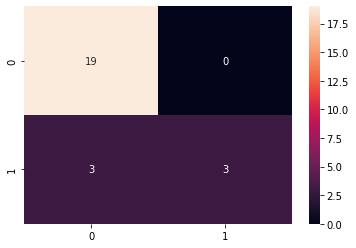

In [28]:
#creating confusion matrix for test prediction
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [29]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93        19
           1       1.00      0.50      0.67         6

    accuracy                           0.88        25
   macro avg       0.93      0.75      0.80        25
weighted avg       0.90      0.88      0.86        25

